In [42]:
import pandas as pd
csvFileName  = 'C:\\Users\\sathy\\Desktop\\ATiML_Project\\master996.csv'
data = pd.read_csv ( open ( csvFileName ), delimiter=';',encoding= 'unicode_escape')

#Extracting the bookid into Dataframe column FileNo, book id pg10067- FileNo - 10067

data['FileNo'] = data['book_id'].str.replace(r'\D+', '').astype(int)

#Sorting the books with fileNo

data.sort_values(by=['FileNo'], inplace=True)
data

,Book_Name,book_id,guten_genre,Author_Name,FileNo
961,Alice's Adventures in Wonderland,pg11CarolAlice.epub,Literary,Carroll| Lewis,11
962,Through the Looking-Glass,pg12CarolGlassLook.epub,Literary,Carroll| Lewis,12
995,A Tale of Two Cities,pg98DickensTaleCities.epub,Literary,Dickens| Charles,98
958,Persuasion,pg105JaneAusPersuatn.epub,Literary,Austen| Jane,105
959,Return of Sherlock Holmes,pg108DoyleReturnSherlk.epub,Detective and Mystery,Connan| Doyle,108
...,...,...,...,...,...
863,Kate Vernon: A Tale. Vol. 2 (of 3),pg53356.epub,Literary,Alexander| Mrs.,53356
864,The Touch of Abner,pg53604.epub,Literary,Cody| H. A.,53604
865,Kate Vernon: A Tale. Vol. 3 (of 3),pg53668.epub,Literary,Alexander| Mrs.,53668
964,Mardi: and A Voyage Thither I,pg13720HermanVoyage1.epub,Sea and Adventure,Melville| Herman,137201


In [43]:
import glob

# Getting all files and its names into dict and then converting to dataframe"""

Content = {}

#Its placed in Books folder at local , need to change it later 
%timeit
files = glob.glob("C:\\Users\\sathy\\Desktop\\ATiML_Project\\Gutenberg_English_Fiction_1k\\Books\\*.html")
for f in files:
    with open(f,mode ='r', encoding = 'utf8') as myfile:
        Content[f]=myfile.read().replace("<br>", '\n')

In [44]:
#Putting it in dataframe
df = pd.DataFrame.from_dict(Content,orient='index').reset_index()
#Renaming column names
df.columns = ['File_Name', 'Data']
#Adding FilNo column to join
df['FileNo'] = df['File_Name'].str.replace(r'\D+', '').astype(int)
df.sort_values(by=['FileNo'], inplace=True)
df

,File_Name,Data,FileNo
23,C:\Users\sathy\Desktop\ATiML_Project\Gutenberg...,<p>Alice was beginning to get very tired of si...,111
47,C:\Users\sathy\Desktop\ATiML_Project\Gutenberg...,"<p>One thing was certain, that the white kitte...",112
1074,C:\Users\sathy\Desktop\ATiML_Project\Gutenberg...,<p>!!!! Book the First - Recalled to Life I. ...,198
4,C:\Users\sathy\Desktop\ATiML_Project\Gutenberg...,"<p>Sir Walter Elliot, of Kellynch Hall, in Som...",1105
8,C:\Users\sathy\Desktop\ATiML_Project\Gutenberg...,<p>It was in the spring of the year 1894 that ...,1108
...,...,...,...
975,C:\Users\sathy\Desktop\ATiML_Project\Gutenberg...,"<p>In 1 Vol. 9s.\n<p>""This book is neither mor...",153356
976,C:\Users\sathy\Desktop\ATiML_Project\Gutenberg...,"<p>""Put me down fer a thousand.""\n<p>These wor...",153604
977,C:\Users\sathy\Desktop\ATiML_Project\Gutenberg...,"<p>In 1 Vol. demy 8vo. Price 12s.\n<p>""This wo...",153668
65,C:\Users\sathy\Desktop\ATiML_Project\Gutenberg...,"<p>DEDICATED TO My Brother, ALLAN MELVILLE.\n<...",1137201


In [45]:
data['Book_Data'] = df.Data
data
books = pd.DataFrame({'Data':data.Book_Data, 'genre':data.guten_genre})
books

,Data,genre
961,<p>It was Carnival time in the ancient and onc...,Literary
962,<p>A king\n<p>Upon whose property...\n<p>A dam...,Literary
995,<p>Edition: 10\n<p>This eBook was produced by ...,Literary
958,<p>Her Fancy and His Fact\n<p>The old by-road ...,Literary
959,<p>A solitary room at midnight: a single wax c...,Detective and Mystery
...,...,...
863,"<p>issued June, 1907\n<p>Devota\n<p>Press of J...",Literary
864,"<p>""The light that never was on sea or land.""\...",Literary
865,<p>page 01b In the heart of a very maze of cou...,Literary
964,<p>A king\n<p>Upon whose property...\n<p>A dam...,Sea and Adventure


In [65]:
from sklearn import preprocessing
from bs4 import BeautifulSoup
import string

# labeling the classes

le = preprocessing.LabelEncoder()
books['genre'] = le.fit_transform(books['genre'])

#checking raw content
books['Data'].head(5)

#cleaning it with soup
books['Data']= [BeautifulSoup(text).get_text() for text in books['Data'] ]

#Make everything in lowe case
books['Data'] = books['Data'].apply(lambda x: x.lower())

#Remove puchtuation
books['Data'] = books['Data'].apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))

#Remove Digits
books['Data'] = books['Data'].apply(lambda x: x.translate(str.maketrans('','', string.digits)))
books['Data'].str.strip()

books['Data'].head(5)

961    it was carnival time in the ancient and once i...
962    a king\nupon whose property\na damnd defeat wa...
995    edition \nthis ebook was produced by david wid...
958    her fancy and his fact\nthe old byroad went ra...
959    a solitary room at midnight a single wax candl...
Name: Data, dtype: object

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from nltk.tokenize import word_tokenize
for i in books.Data[1]:
    books.Data[i] = word_tokenize(str(books.Data))

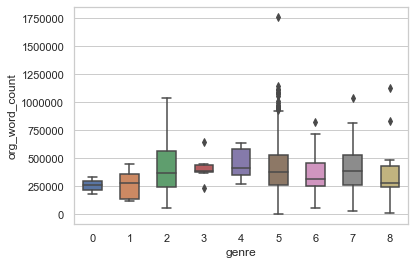

In [49]:
#String original length of each book
books['org_word_count'] = books['Data'].apply(len)
books

#Plotting the grpah for each gerne by original word count
import seaborn as sns
sns.set(style="whitegrid")
#Bar Graph
#ax = sns.barplot(x="genre", y="org_word_count", data=books)
ax = sns.boxplot(x="genre", y="org_word_count", data=books, width=.5)

In [9]:
y= books['genre']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3) 

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

c_score = clf.fit(X_train, y_train).score(X_test,y_test) 
print("Score before any preprocessing is :"+str(c_score))

#show the confusin matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred) 
print(cm)

Score before any preprocessing is :0.7993311036789298
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.80      1.00      0.89       239
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         5

    accuracy                           0.80       299
   macro avg       0.10      0.12      0.11       299
weighted avg       0.64      0.80      0.71       299

[[  0   0   0   0   1   0   0   0]
 [  0   0   0   0  32   0   0   0]
 [  0   0   0   0   2   0   0   0]
 [  0   0   0   0   2   0   0   0]
 [  0   0   0   0 239   0   0   0]
 [  0   0   0   0   5   0   0   0]
 [  0   0   0   0  13   0   0   0]
 [  0   0   0   0   5   0   0   0]]


C:\Users\sathy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
